# Fitting Models Exercise 2

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a decaying oscillation

For this problem you are given a raw dataset in the file `decay_osc.npz`. This file contains three arrays:

* `tdata`: an array of time values
* `ydata`: an array of y values
* `dy`: the absolute uncertainties (standard deviations) in y

Your job is to fit the following model to this data:

$$ y(t) = A e^{-\lambda t} \cos{\omega t + \delta} $$

First, import the data using NumPy and make an appropriately styled error bar plot of the raw data.

In [2]:
# YOUR CODE HERE
#raise NotImplementedError()
with np.load('decay_osc.npz') as data:
    tdata = data['tdata']
    ydata = data['ydata']
    dy = data['dy']

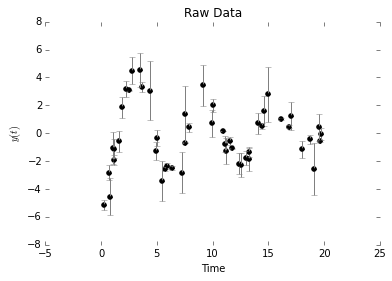

In [3]:
plt.scatter(tdata,ydata, color = 'k')
plt.errorbar(tdata, ydata, dy,
             fmt='.k', ecolor='gray')
plt.box(False)
plt.title("Raw Data")
plt.xlabel('Time')
plt.ylabel('$y(t)$');

In [4]:
assert True # leave this to grade the data import and raw data plot

Now, using `curve_fit` to fit this model and determine the estimates and uncertainties for the parameters:

* Print the parameters estimates and uncertainties.
* Plot the raw and best fit model.
* You will likely have to pass an initial guess to `curve_fit` to get a good fit.
* Treat the uncertainties in $y$ as *absolute errors* by passing `absolute_sigma=True`. 

A = -4.896 +/- 0.063
λ = 0.094 +/- 0.003
ω = -1.001 +/- 0.001
δ = 0.027 +/- 0.014


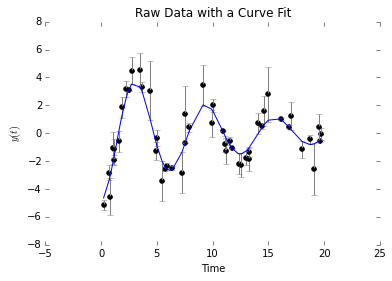

In [10]:
# YOUR CODE HERE
#raise NotImplementedError()
def funct(t, a, lamba, omega, delta):
    return a*np.e**(-lamba*t) * np.cos(omega*t) + delta
theta, theta_dev = opt.curve_fit(funct, tdata, ydata, sigma=dy, absolute_sigma=True)

print('A = {0:.3f} +/- {1:.3f}'.format(theta[0], np.sqrt(theta_dev[0,0])))
print('λ = {0:.3f} +/- {1:.3f}'.format(theta[1], np.sqrt(theta_dev[1,1])))
print('ω = {0:.3f} +/- {1:.3f}'.format(theta[2], np.sqrt(theta_dev[2,2])))
print('δ = {0:.3f} +/- {1:.3f}'.format(theta[3], np.sqrt(theta_dev[3,3])))

plt.scatter(tdata,ydata, color = 'k')
plt.errorbar(tdata, ydata, dy,
             fmt='.k', ecolor='gray')

yfit = funct(tdata, theta[0],theta[1],theta[2],theta[3])
plt.plot(tdata, yfit, color = 'b')

plt.box(False)
plt.title("Raw Data with a Curve Fit")
plt.xlabel('Time')
plt.ylabel('$y(t)$');

In [6]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors